In [34]:
# Make a table given the two scores
# probably should summarize them into mean, sd per downstream task
import torch

In [35]:
qm9_index = {0: 'Dipole moment',
1: 'Isotropic polarizability',
2: 'Highest occupied molecular orbital energy',
3: 'Lowest unoccupied molecular orbital energy',
4: 'Gap between previous 2',
5: 'Electronic spatial extent',
6: 'Zero point vibrational energy',
7: 'Internal energy at 0K',
8: 'Internal energy at 298.15K',
9: 'Enthalpy at 298.15K',
10: 'Free energy at 298.15K',
11: 'Heat capavity at 298.15K',
12: 'Atomization energy at 0K',
13: 'Atomization energy at 298.15K',
14: 'Atomization enthalpy at 298.15K',
15: 'Atomization free energy at 298.15K',
16: 'Rotational constant A',
17: 'Rotational constant B',
18: 'Rotational constant C',}

In [36]:
metrics = ['MSE', 'MAE', 'R2']

In [37]:
# Need a step here to aggregate over trials:
n_trials = 3

vscores = []
for t in range(n_trials):
    scoremat = torch.load(f'heatmap_results/vicreg_{t}.pt')
    vscores.append(scoremat)
    
vscores = torch.stack(vscores, dim = -1) # Stack on last dim
print(vscores.shape)
    
sscores = []
for t in range(n_trials):
    scoremat = torch.load(f'heatmap_results/supervised_{t}.pt')
    sscores.append(scoremat)
    
sscores = torch.stack(sscores, dim = -1)
print(sscores.shape)


def summarize(score_mat):
    # Input: score mat of [n_tasks, metric, n_trials]
    
    means = torch.mean(score_mat, dim = 2) # Mean along trials dimension
    sds = torch.std(score_mat, dim = 2) # Sdev along trials dimension
    print('summarized: ', means.shape, sds.shape)
    
    return means, sds

vmean, vsd = summarize(vscores)
smean, ssd = summarize(sscores)

torch.Size([19, 3, 3])
torch.Size([19, 3, 3])
summarized:  torch.Size([19, 3]) torch.Size([19, 3])
summarized:  torch.Size([19, 3]) torch.Size([19, 3])


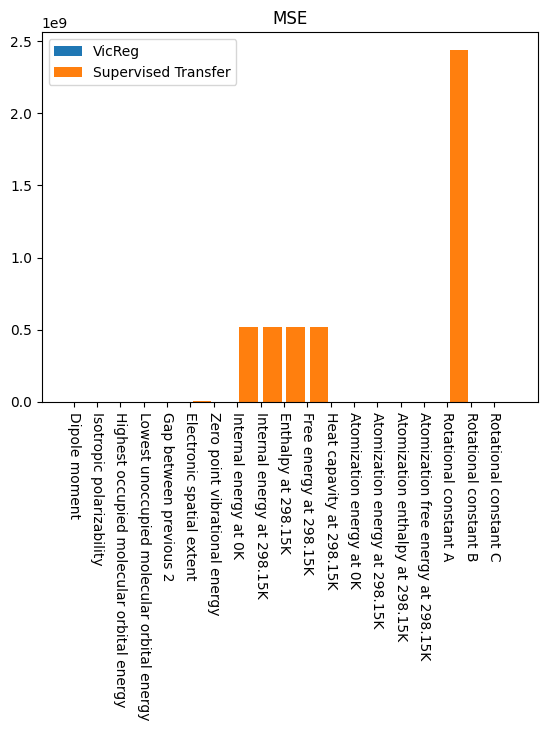

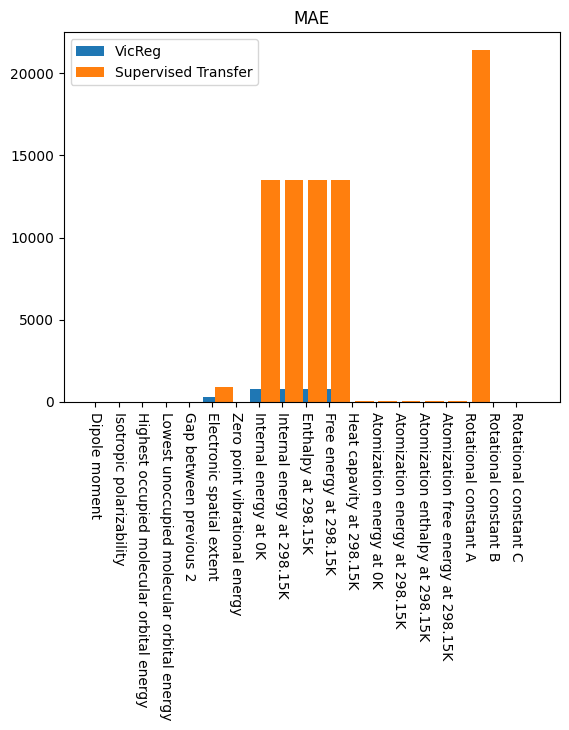

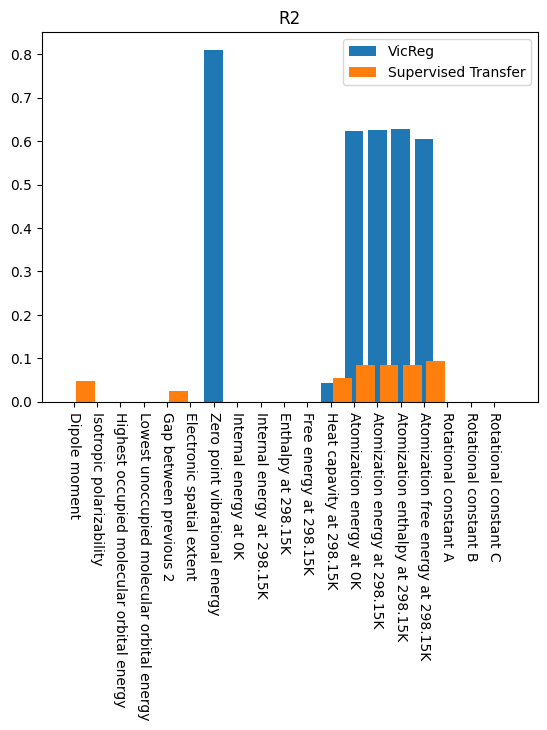

In [41]:
import matplotlib.pyplot as plt

# Preprocess the matrices by only plotting the difference in scores?

for met in range(3):
    x = range(19)

    plt.bar(x = x, height = [max(0,x) for x in vmean[:,met]], label = 'VicReg')
    plt.bar(x = [a+0.5 for a in x], height = [max(0,x) for x in smean[:,met]], label = 'Supervised Transfer')
    #plt.bar(x = x, height = vmean[:,met]-smean[:,met], label = 'VicReg')
    
    plt.xticks(x, qm9_index.values(), rotation = -90)
    plt.legend(loc = 'best')
    plt.title(metrics[met])
    plt.show()

In [7]:
for met, vscore, tscore in zip(metrics, vicreg_scores, transfer_scores):
    print(met, vscore, tscore)

MSE tensor([2.3059e+03, 4.9929e+01, 8.9517e+01, 2.4395e+01, 2.1958e+01, 6.7009e+04,
        1.0611e+01, 1.8905e+07, 1.8919e+07, 1.8928e+07, 1.8915e+07, 7.9999e+00,
        1.7367e+02, 1.8618e+02, 1.9265e+02, 1.0920e+02, 3.7677e+02, 3.6095e-01,
        1.4916e+00]) tensor([1.5095e+01, 3.9365e+01, 5.8516e-01, 2.4781e+01, 1.9931e+01, 2.6232e+05,
        3.8845e+00, 2.8197e+06, 2.8196e+06, 2.8197e+06, 2.8201e+06, 2.2977e+02,
        3.6015e+02, 3.6678e+02, 3.7382e+02, 2.8455e+02, 2.3706e+02, 6.1771e+01,
        3.1327e+01])
MAE tensor([3.7061e+01, 5.3332e+00, 7.2922e+00, 3.8561e+00, 3.5855e+00, 1.8526e+02,
        2.4848e+00, 3.3311e+03, 3.3323e+03, 3.3331e+03, 3.3320e+03, 2.1455e+00,
        9.7943e+00, 1.0157e+01, 1.0338e+01, 7.6857e+00, 1.4984e+01, 4.4917e-01,
        9.4190e-01]) tensor([2.8406e+00, 4.7202e+00, 5.9248e-01, 3.6528e+00, 3.2613e+00, 3.8832e+02,
        1.4226e+00, 1.2249e+03, 1.2249e+03, 1.2249e+03, 1.2250e+03, 1.1069e+01,
        1.3751e+01, 1.3877e+01, 1.4009e+01, 1.222